In [1]:
import torch
from torch import nn

from random import randint

from torchvision.datasets import ImageFolder
from torchvision.transforms.functional import to_pil_image, to_tensor

from models import Generator, Discriminator
from config import Config
from train import train_model
from utils import weight_init

# Data overview

In [2]:
dataset = ImageFolder('data/')

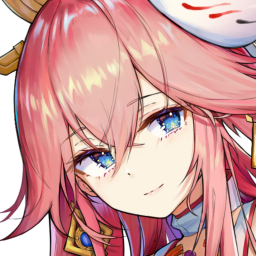

In [3]:
dataset[randint(0, len(dataset)-1)][0]

# Models training

In [4]:
cfg = Config()

In [5]:
g = Generator(cfg).to(cfg.device)
g.apply(weight_init)

Generator(
  (attn1): Self_Attn(
    (f_conv): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1))
    (g_conv): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1))
    (sm): Softmax(dim=-1)
  )
  (attn2): Self_Attn(
    (f_conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
    (g_conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
    (sm): Softmax(dim=-1)
  )
  (l1): Sequential(
    (0): SpectralNorm(
      (module): ConvTranspose2d(64, 512, kernel_size=(4, 4), stride=(2, 2), bias=False)
    )
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (l2): Sequential(
    (0): SpectralNorm(
      (module): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(4, 4), bias=False)
    )
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (l3): Sequential(
    (0): SpectralNorm(
      (module): ConvTranspose2d(256, 128, kernel_size=(2, 2), s

In [ ]:
d = Discriminator(cfg).to(cfg.device)
d.apply(weight_init)

In [ ]:
g_opt = torch.optim.Adam(g.parameters(), lr=cfg.lr, betas=(cfg.beta1, 0.999))
d_opt = torch.optim.Adam(d.parameters(), lr=cfg.lr, betas=(cfg.beta1, 0.999))

criterion =  nn.BCELoss()

In [ ]:
results = train_model(g, d, d_opt, g_opt, criterion)